## **Creating the Dataset**


In [1]:
!pip install -qq google-play-scraper
!pip install -qq -U watermark

import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

App that we're going to pick. We need the package name, this can be found in the url tab when you open the page.

In this case,
https://play.google.com/store/apps/details?id=com.zy.wqmt.global&hl=en&gl=US

com.zy.wqmt.global is the package

In [2]:
info = app('com.YoStarEN.Arknights',lang='en',country='us')
del info['comments']
print(info)

{'title': 'Arknights', 'description': "Take on the role of a key member of Rhodes Island, a pharmaceutical company that fights both a deadly infection and the unrest it leaves in its wake. Together with your leader Amiya, you’ll recruit Operators, train them, then assign them to various operations to protect the innocent and resist those who would thrust the world into turmoil.\r\n\r\n\r\nYour tactics will determine the future of Rhodes Island. Fight for the Dawn!\r\n\r\n・Gorgeous anime-style game with a perfect combination of RPG and strategy elements\r\n・Hundreds of unique Operators across a variety of classes open up countless gameplay options\r\n・Auto Deploy system conveniently allows you to free up your hands\r\n・Carve out a home, just the way you want it, with the Base construction system\r\n・A robust soundtrack and some of the most famous Japanese voice actors and actresses will give you a sublime auditory experience.\r\n\r\nPermission: WRITE_EXTERNAL_STORAGE and READ_EXTERNAL_S

Using json to tidy the presentation

In [3]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [4]:
print_json(info)

{
  "adSupported": false,
  "appId": "com.YoStarEN.Arknights",
  "categories": [
    {
      "id": "GAME_STRATEGY",
      "name": "Strategy"
    },
    {
      "id": null,
      "name": "Tactics"
    },
    {
      "id": "GAME_CASUAL",
      "name": "Casual"
    },
    {
      "id": null,
      "name": "Single player"
    },
    {
      "id": null,
      "name": "Stylized"
    },
    {
      "id": null,
      "name": "Anime"
    }
  ],
  "containsAds": false,
  "contentRating": "Teen",
  "contentRatingDescription": "Violence, Blood, Use of Alcohol, Language",
  "currency": "USD",
  "description": "Take on the role of a key member of Rhodes Island, a pharmaceutical company that fights both a deadly infection and the unrest it leaves in its wake. Together with your leader Amiya, you\u2019ll recruit Operators, train them, then assign them to various operations to protect the innocent and resist those who would thrust the world into turmoil.\r\n\r\n\r\nYour tactics will determine the futur

Scraping the reviews

In [5]:
app_reviews = []

for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
        rvs, _ = reviews(
            'com.YoStarEN.Arknights',
            lang='en',
            country='us',
            sort=sort_order,
            count=1500 if score == 3 else 750,
            filter_score_with=score
        )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = 'com.YoStarEN.Arknights'

            # Skip reviews with less than 15 characters
            if len(r['content']) < 15:
                continue

            # Append the review to app_reviews
            app_reviews.append(r)


See a sample of 1 app review

In [6]:
print_json(app_reviews[0])

{
  "appId": "com.YoStarEN.Arknights",
  "appVersion": "19.0.01",
  "at": "2023-11-30 19:52:07",
  "content": "Man it suck when your internet is down after you clear the stage and it count as lose so you have to back to main screen and start over again especially IS stage,and i think it's about time we have auto repeat or skip tickets or at least let us repeat in the finish screen so we dont have to wait loading to press auto battle again, also i think it's quite harsh for newbie when event come since they probably can't beat stage past some certain point and reduce their reward which i think it's harsh",
  "repliedAt": "2023-12-04 08:35:20",
  "replyContent": "Dear player, We've received your feedback! We can't make the game better without hearing from the communities. You can contact our CS e-mail address for more details. Our CS e-mail address: arknights.en.cs@yo-star.com.\n",
  "reviewCreatedVersion": "19.0.01",
  "reviewId": "58926f78-7642-4e6b-baa4-28c54a223c96",
  "score": 1,
  

In [7]:
len(app_reviews)

8251

In [8]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

## **Data Preprocessing**

### Read the csv file

In [9]:
df = pd.read_csv("./reviews.csv")
df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,58926f78-7642-4e6b-baa4-28c54a223c96,Fatih Dhiyya,https://play-lh.googleusercontent.com/a-/ALV-U...,Man it suck when your internet is down after y...,1,2,19.0.01,2023-11-30 19:52:07,"Dear player, We've received your feedback! We ...",2023-12-04 08:35:20,19.0.01,most_relevant,com.YoStarEN.Arknights
1,357a051d-cf45-432c-a9b2-d527b2a9267f,Divide By_Zero,https://play-lh.googleusercontent.com/a-/ALV-U...,"Honestly, I've been falling into Gacha games a...",1,2,19.0.01,2023-11-17 03:48:39,"Dear player, We've received your feedback and ...",2023-11-20 10:29:01,19.0.01,most_relevant,com.YoStarEN.Arknights
2,b8a55d8d-0136-46c6-a5e5-394f987d49bb,shinami,https://play-lh.googleusercontent.com/a/ACg8oc...,Teaches you basic tactics only for the followi...,1,4,19.0.01,2023-11-22 06:44:20,"Dear player, We've received your feedback! May...",2023-11-27 07:57:39,19.0.01,most_relevant,com.YoStarEN.Arknights


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8251 entries, 0 to 8250
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              8251 non-null   object
 1   userName              8251 non-null   object
 2   userImage             8251 non-null   object
 3   content               8251 non-null   object
 4   score                 8251 non-null   int64 
 5   thumbsUpCount         8251 non-null   int64 
 6   reviewCreatedVersion  5889 non-null   object
 7   at                    8251 non-null   object
 8   replyContent          3596 non-null   object
 9   repliedAt             3596 non-null   object
 10  appVersion            5889 non-null   object
 11  sortOrder             8251 non-null   object
 12  appId                 8251 non-null   object
dtypes: int64(2), object(11)
memory usage: 838.1+ KB


### Change rating 2 to 1 and 4 to 5

In [11]:
df['score'] = df['score'].replace({2: 1, 4: 5})

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,58926f78-7642-4e6b-baa4-28c54a223c96,Fatih Dhiyya,https://play-lh.googleusercontent.com/a-/ALV-U...,Man it suck when your internet is down after y...,1,2,19.0.01,2023-11-30 19:52:07,"Dear player, We've received your feedback! We ...",2023-12-04 08:35:20,19.0.01,most_relevant,com.YoStarEN.Arknights
1,357a051d-cf45-432c-a9b2-d527b2a9267f,Divide By_Zero,https://play-lh.googleusercontent.com/a-/ALV-U...,"Honestly, I've been falling into Gacha games a...",1,2,19.0.01,2023-11-17 03:48:39,"Dear player, We've received your feedback and ...",2023-11-20 10:29:01,19.0.01,most_relevant,com.YoStarEN.Arknights
2,b8a55d8d-0136-46c6-a5e5-394f987d49bb,shinami,https://play-lh.googleusercontent.com/a/ACg8oc...,Teaches you basic tactics only for the followi...,1,4,19.0.01,2023-11-22 06:44:20,"Dear player, We've received your feedback! May...",2023-11-27 07:57:39,19.0.01,most_relevant,com.YoStarEN.Arknights
3,2fdeeae2-160b-4d66-92ac-e31646fa911e,HulkGameCrit,https://play-lh.googleusercontent.com/a-/ALV-U...,updated for lone trail: game continues to be u...,1,8,19.0.01,2023-11-15 12:29:53,"Dear player, We've received your feedback! May...",2023-11-20 10:35:48,19.0.01,most_relevant,com.YoStarEN.Arknights
4,e8159608-5904-4b6a-92c2-0739564b207e,N R,https://play-lh.googleusercontent.com/a-/ALV-U...,"Horror for new players. 30 pulls, got nothing ...",1,6,19.0.01,2023-11-06 20:35:08,NaN,NaN,19.0.01,most_relevant,com.YoStarEN.Arknights


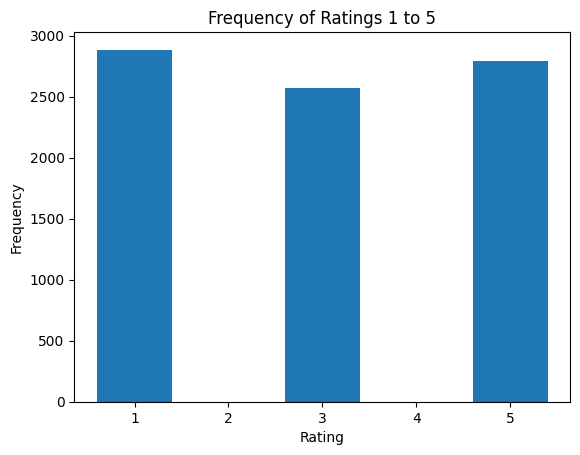

In [12]:

counts = df['score'].value_counts().sort_index()

# Create a bar chart
plt.bar(counts.index, counts.values)

# Add labels and a title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Ratings 1 to 5')

# Show the plot
plt.show()

### Dropping irrelevant columns

In [13]:
df = df.drop(columns=['reviewId','userName','userImage','replyContent','repliedAt','appVersion','sortOrder','appId','at','reviewCreatedVersion','thumbsUpCount'],axis=1)
df.head(5)

,content,score
0,Man it suck when your internet is down after y...,1
1,"Honestly, I've been falling into Gacha games a...",1
2,Teaches you basic tactics only for the followi...,1
3,updated for lone trail: game continues to be u...,1
4,"Horror for new players. 30 pulls, got nothing ...",1


In [14]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Lower Casing, remove punctuations



In [15]:
#lower case
df["content"] = df["content"].str.lower()

#remove punctuation
df['content'] = df['content'].str.replace('[^\w\s]','')

<ipython-input-15-daf0235d722b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')


### Remove stop words

In [16]:
nltk.download('stopwords')
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove emojis

In [17]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['content'] = df['content'].apply(remove_emoji)

### Lemmatization

In [18]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['content'] = df['content'].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
df.to_csv('cleanedreview.csv', index=False)

In [20]:
# Load the CSV file into a DataFrame
df = pd.read_csv('cleanedreview.csv')

# Use the sample method to randomly shuffle the rows
df_shuffled = df.sample(frac=1, random_state=42)

# Calculate the index to split the DataFrame
split_index = int(0.75 * len(df_shuffled))

# Split the DataFrame into two parts
df_train = df_shuffled[:split_index]
df_test = df_shuffled[split_index:]

# Save the two DataFrames into separate CSV files
df_train.to_csv('train.csv', index=False)
df_test.to_csv('test.csv', index=False)

### Label Encoding

In [21]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data = train_data.dropna()
test_data = test_data.dropna()

In [22]:
X_train = train_data.content
Y_train = train_data.score

In [23]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_train = pd.DataFrame(Y_train,columns=['score'])
Y_train.head()

,score
0,1
1,2
2,0
3,1
4,1


In [24]:
test_data.head()

,content,score
0,cool game kinda difficult recently get episode...,3
1,left positive review chromebook reastarting ev...,1
2,fun first couple day played til kept crashing ...,3
3,game fun got boring unstalled game stayed syst...,3
4,finally yostar decent ad yt show gameplay,5


In [25]:
X_test = test_data.content
Y_test = test_data.score

In [26]:
X_test.head()
Y_test.head()

0    3
1    1
2    3
3    3
4    5
Name: score, dtype: int64

In [27]:
Y_test = encoder.fit_transform(Y_test)
Y_test = pd.DataFrame(Y_test,columns=['score'])
Y_test.head()

,score
0,1
1,0
2,1
3,1
4,2


## Machine Learning Model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer(max_features= 1625, min_df = 2, max_df = 0.8)
# fit the model for training data
X_train_data = vectorizer.fit_transform(X_train)
X_train_data.shape

(6188, 1625)

In [30]:
X_test_data = vectorizer.fit_transform(X_test)

In [31]:
Y_train = encoder.fit_transform(Y_train)
Y_train = pd.DataFrame(Y_train,columns=['score'])
Y_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,score
0,1
1,2
2,0
3,1
4,1


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
transformer = TfidfTransformer()
X_train_data = transformer.fit_transform(X_train_data).toarray()

print(X_train_data.shape)

(6188, 1625)


### Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [65]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_data, Y_train, test_size=0.25,random_state = 42)

modelNB = MultinomialNB()
y_train_pred = modelNB.fit(X1_train,y1_train.score).predict(X1_train)

y_pred = modelNB.predict(X1_test)

# comparing actual response values  with predicted response values
from sklearn import metrics
print("Multinomial Naive Bayes model train accuracy:", metrics.accuracy_score(y1_train, y_train_pred)*100)
print("Multinomial Naive Bayes model test accuracy:", metrics.accuracy_score(y1_test, y_pred)*100)


Multinomial Naive Bayes model train accuracy: 71.29928894634777
Multinomial Naive Bayes model test accuracy: 59.469941822883


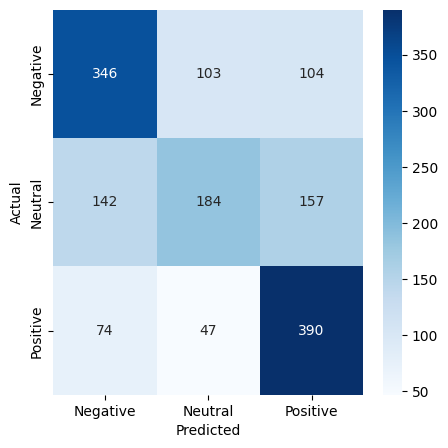

In [40]:
cm = confusion_matrix(y1_test, y_pred)

labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
print(classification_report(y1_test, y_pred, target_names=[' Negative',	 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.62      0.63      0.62       553
     Neutral       0.55      0.38      0.45       483
    Positive       0.60      0.76      0.67       511

    accuracy                           0.59      1547
   macro avg       0.59      0.59      0.58      1547
weighted avg       0.59      0.59      0.58      1547



### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

Random Forest model train accuracy:  73.992673992674
Random Forest model test accuracy:  60.89204912734324
              precision    recall  f1-score   support

    Negative       0.61      0.67      0.64       553
     Neutral       0.57      0.37      0.45       483
    Positive       0.63      0.76      0.69       511

    accuracy                           0.61      1547
   macro avg       0.60      0.60      0.59      1547
weighted avg       0.60      0.61      0.60      1547



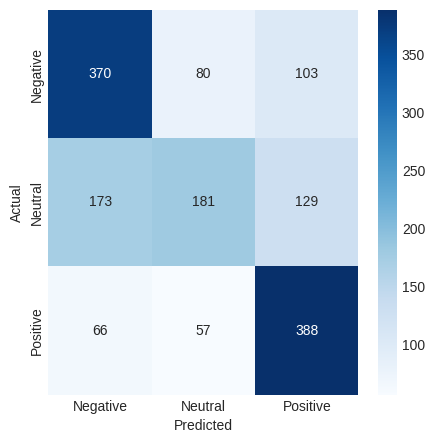

In [83]:
rf_model=RandomForestClassifier(n_estimators=300,min_samples_split = 10,min_samples_leaf = 8)
train_pred = rf_model.fit(X1_train,y1_train.score).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy: ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("Random Forest model test accuracy: ", prediction*100)

print(classification_report(y1_test, test_pred, target_names =['Negative','Neutral','Positive']))

cm = confusion_matrix(y1_test, test_pred)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### RNN Model

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [45]:
tokenizer = Tokenizer(num_words=50000, lower=True,split=' ', char_level=False, oov_token='<UNK>', document_count=0)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(Y_train)

wordindex=tokenizer.word_index

In [46]:
tokenizer_config = tokenizer.get_config()
tokenizer_config.keys()

dict_keys(['num_words', 'filters', 'lower', 'split', 'char_level', 'oov_token', 'document_count', 'word_counts', 'word_docs', 'index_docs', 'index_word', 'word_index'])

In [47]:
import tensorflow.keras.preprocessing.sequence as ps

In [48]:
max_length = 50
train_sequence = tokenizer.texts_to_sequences(X_train)
train_padding = ps.pad_sequences(train_sequence,maxlen=max_length,padding='post')

test_sequence = tokenizer.texts_to_sequences(X_test)
test_padding = ps.pad_sequences(test_sequence,maxlen=max_length,padding='post')
Y_train.shape

(6188, 1)

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
y_train = OneHotEncoder().fit_transform(Y_train)
y_test = OneHotEncoder().fit_transform(Y_test)


In [51]:
print(y_train.shape)
print(y_test.shape)

(6188, 3)
(2063, 3)


In [52]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,Dropout
import tensorflow
from keras.callbacks import EarlyStopping
from keras.layers import GlobalAveragePooling1D

In [53]:
# Building the model
base_model = Sequential()
base_model.add(Embedding(50000,128,input_length=train_padding.shape[1]))
base_model.add(GlobalAveragePooling1D())
base_model.add(Dense(8,activation='relu'))
base_model.add(Dense(3,activation='softmax'))
base_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           6400000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 6401059 (24.42 MB)
Trainable params: 6401059 (24.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
base_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
y_train=np.array(y_train.toarray())
train_padding=np.array(train_padding)

history_base = base_model.fit(train_padding,y_train ,epochs=10, validation_split=0.2)


Epoch 1/10
155/155 [==============================] - 16s 94ms/step - loss: 1.0638 - accuracy: 0.4560 - val_loss: 0.9971 - val_accuracy: 0.5250
Epoch 2/10
155/155 [==============================] - 14s 92ms/step - loss: 0.9025 - accuracy: 0.5802 - val_loss: 0.8482 - val_accuracy: 0.6131
Epoch 3/10
155/155 [==============================] - 14s 91ms/step - loss: 0.7188 - accuracy: 0.7053 - val_loss: 0.7717 - val_accuracy: 0.6559
Epoch 4/10
155/155 [==============================] - 14s 91ms/step - loss: 0.5652 - accuracy: 0.7949 - val_loss: 0.7462 - val_accuracy: 0.6793
Epoch 5/10
155/155 [==============================] - 14s 93ms/step - loss: 0.4532 - accuracy: 0.8380 - val_loss: 0.7399 - val_accuracy: 0.6906
Epoch 6/10
155/155 [==============================] - 14s 94ms/step - loss: 0.3688 - accuracy: 0.8731 - val_loss: 0.7494 - val_accuracy: 0.6971
Epoch 7/10
155/155 [==============================] - 15s 97ms/step - loss: 0.3049 - accuracy: 0.9010 - val_loss: 0.7617 - val_accuracy:

Graph before regularization

<ipython-input-55-4c115d5840cd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 1.1081081233918666)

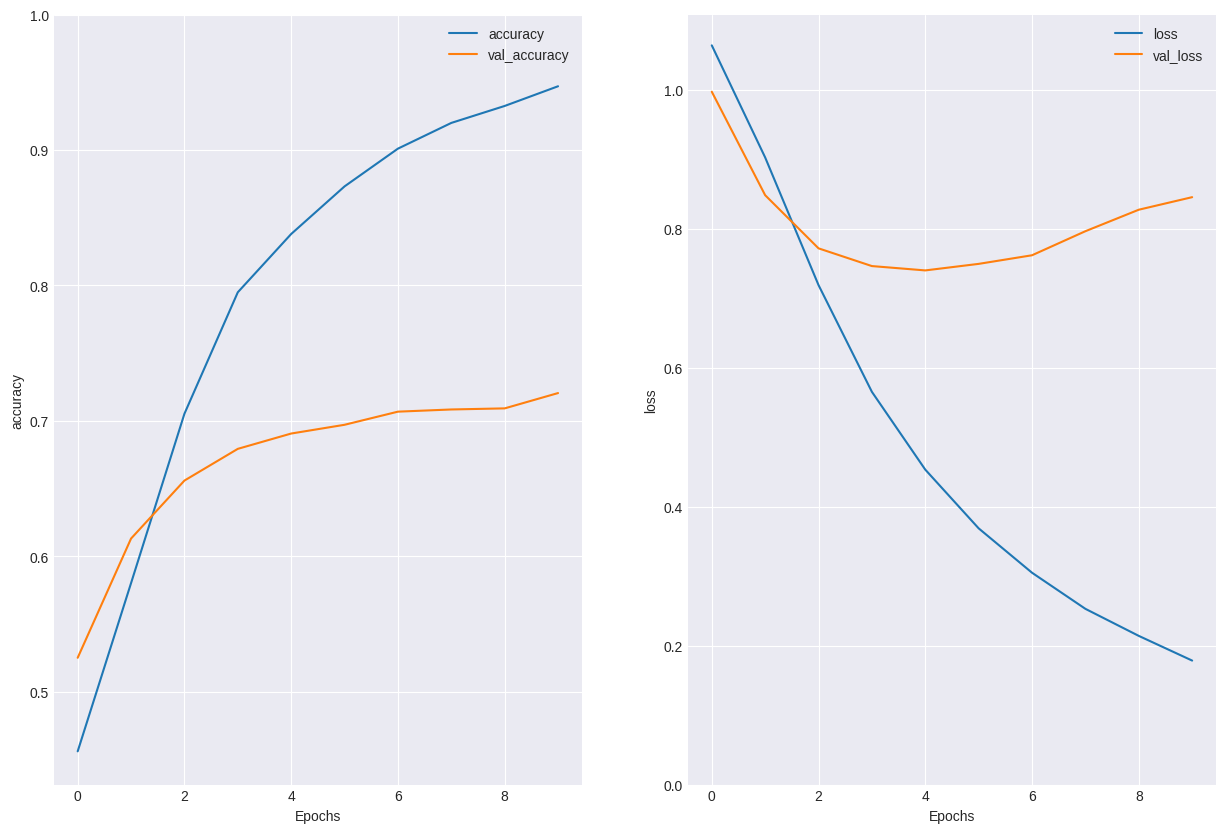

In [55]:
plt.style.use('seaborn-darkgrid')
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history_base, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_base, 'loss')
plt.ylim(0, None)

Handling overfit

In [56]:
regularise = tensorflow.keras.regularizers.l2(0.001)

modelRNN = Sequential()
modelRNN.add(Embedding(50000,128,input_length=train_padding.shape[1]))
modelRNN.add(Dropout(0.5))
modelRNN.add(GlobalAveragePooling1D())
modelRNN.add(Dense(8,activation='relu',kernel_regularizer=regularise))
modelRNN.add(Dropout(0.5))
modelRNN.add(Dense(3,activation='softmax'))
modelRNN.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           6400000   
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                      

In [57]:
modelRNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
historyRNN = modelRNN.fit(train_padding,y_train ,epochs=10, validation_split=0.2)

Epoch 1/10
155/155 [==============================] - 15s 91ms/step - loss: 1.0988 - accuracy: 0.3861 - val_loss: 1.0761 - val_accuracy: 0.4645
Epoch 2/10
155/155 [==============================] - 14s 87ms/step - loss: 1.0543 - accuracy: 0.4459 - val_loss: 1.0084 - val_accuracy: 0.5404
Epoch 3/10
155/155 [==============================] - 14s 90ms/step - loss: 0.9844 - accuracy: 0.5360 - val_loss: 0.9401 - val_accuracy: 0.5977
Epoch 4/10
155/155 [==============================] - 14s 93ms/step - loss: 0.9171 - accuracy: 0.5897 - val_loss: 0.8972 - val_accuracy: 0.6139
Epoch 5/10
155/155 [==============================] - 14s 90ms/step - loss: 0.8661 - accuracy: 0.6232 - val_loss: 0.8665 - val_accuracy: 0.6292
Epoch 6/10
155/155 [==============================] - 14s 88ms/step - loss: 0.8296 - accuracy: 0.6642 - val_loss: 0.8594 - val_accuracy: 0.6268
Epoch 7/10
155/155 [==============================] - 14s 89ms/step - loss: 0.7952 - accuracy: 0.6832 - val_loss: 0.8406 - val_accuracy:

Graph after regularization

(0.0, 1.1177223026752472)

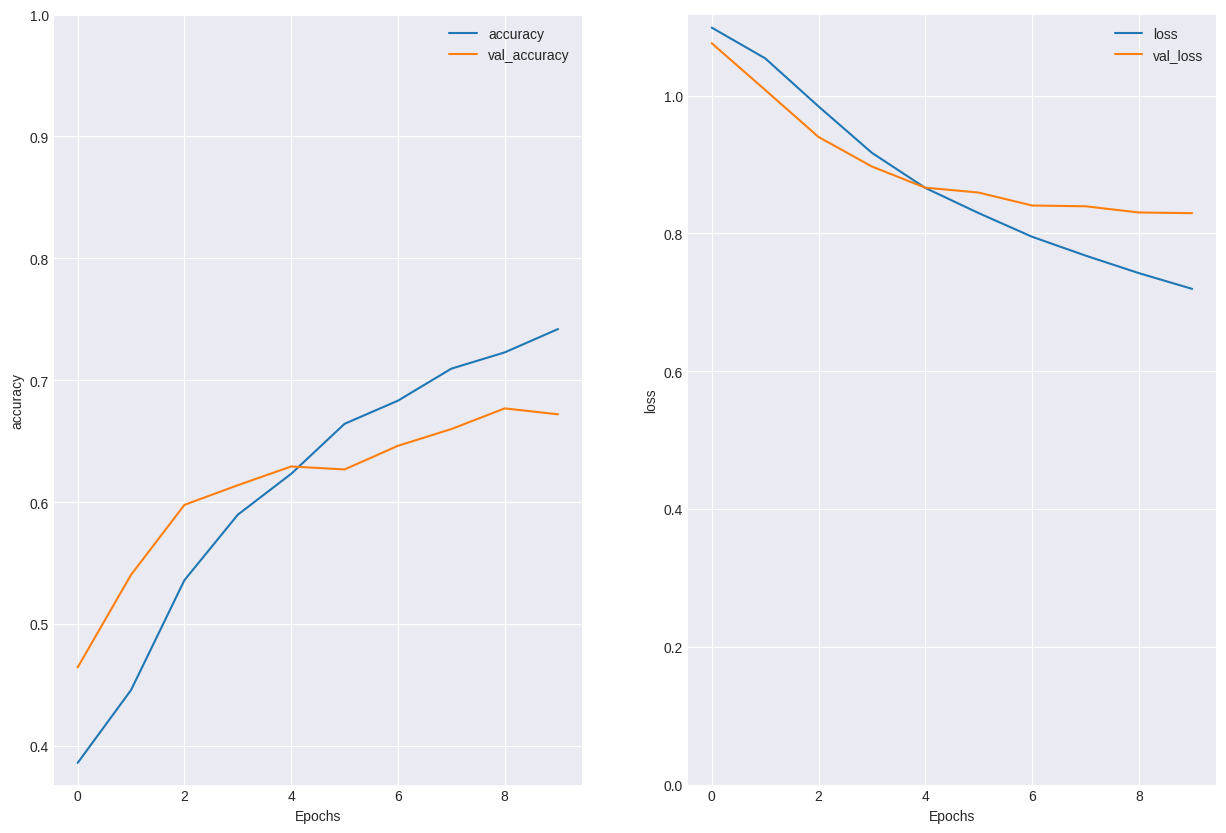

In [58]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(historyRNN, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(historyRNN, 'loss')
plt.ylim(0, None)

Model Score

In [59]:
score = modelRNN.evaluate(test_padding,y_test.toarray())
print("Testing Accuracy: ", score[1]*100)

65/65 [==============================] - 0s 2ms/step - loss: 0.8390 - accuracy: 0.6718
Testing Accuracy:  67.18371510505676


65/65 [==============================] - 0s 2ms/step


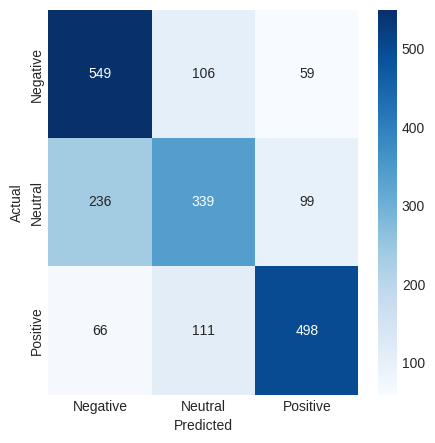

In [60]:
y_pred = modelRNN.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])

cm = confusion_matrix(y_test_labels, y_predicted_labels)

labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
print(classification_report(y_test_labels, y_predicted_labels, target_names=[' Negative',	 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.65      0.77      0.70       714
     Neutral       0.61      0.50      0.55       674
    Positive       0.76      0.74      0.75       675

    accuracy                           0.67      2063
   macro avg       0.67      0.67      0.67      2063
weighted avg       0.67      0.67      0.67      2063

